# Chapter 4: Training Models

## The Normal Equation

To find the value of $\theta$ that minimizes the cost funciton, there is a *closed-form solution* - in other words, an equation that gives the result directly. This is called the *Normal Equation*:

$$ \hat{\theta} = (X^{T}X)^{-1} X^{T} y$$

- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
- $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$.

Let's generate some linear looking data to test this equation

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

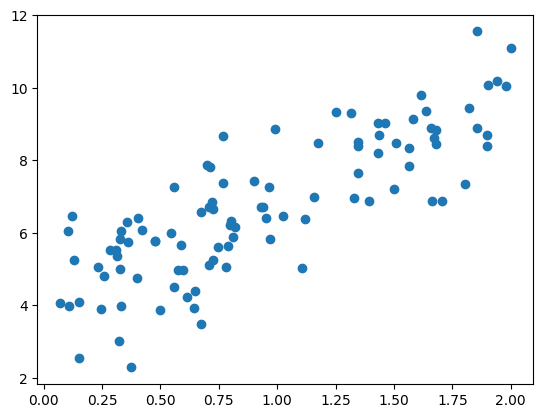

In [17]:
# visualizing the data
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(X, y)

plt.show()

Now let's find $\hat{\theta}$ using the Normal Equation. We will use the `inv()` function to compute the inverse of a matrix, and the `dot()` method for matrix multiplication:

In [19]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.04830559],
       [2.84293233]])

Now we have the exact parameters of the original function. So now we can make predictions using $\hat{\theta}$:

In [20]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04830559],
       [9.73417025]])

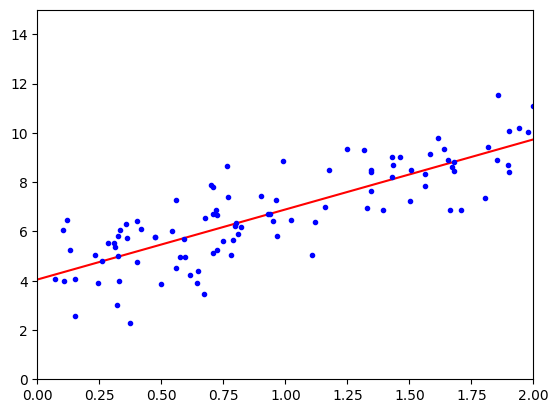

In [22]:
# plotting this model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Perofrming linear regression using Scikit-Learn is simple:

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.04830559]), array([[2.84293233]]))

In [25]:
lin_reg.predict(X_new)

array([[4.04830559],
       [9.73417025]])

In [26]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.04830559],
       [2.84293233]])

In [27]:
np.linalg.pinv(X_b).dot(y)

array([[4.04830559],
       [2.84293233]])

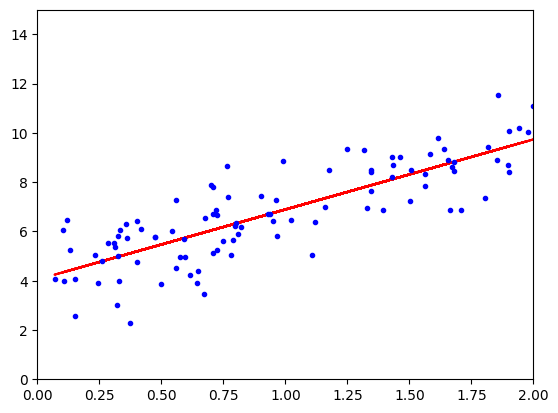

In [29]:
# plotting this model's predictions
plt.plot(X, lin_reg.predict(X), "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()